In [23]:
import tensorflow as tf

cnn = tf.keras.models.load_model('cifar10_accuracy_82v1.h5')
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [24]:
from glob import glob
import cv2

test_image_data_list = glob('my_test_image/*/*')

labels = []
src_list = []

for idx in range(len(test_image_data_list)):
    labels.append(test_image_data_list[idx].split('/')[1].strip())
    src_img = cv2.imread(test_image_data_list[idx], cv2.IMREAD_COLOR)
    src_list.append(src_img)

In [25]:
import cv2

dst_list = []

for idx in range(len(src_list)):

    dst_img = cv2.cvtColor(src_list[idx], cv2.COLOR_BGR2RGB)
    dst_img = cv2.resize(dst_img, dsize=(32,32))
    dst_img = dst_img / 255.0

    print(src_list[idx].shape, dst_img.shape)

    dst_list.append(dst_img)

(918, 1280, 3) (32, 32, 3)
(332, 500, 3) (32, 32, 3)
(697, 1024, 3) (32, 32, 3)
(136, 200, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(1000, 1500, 3) (32, 32, 3)
(560, 560, 3) (32, 32, 3)
(251, 201, 3) (32, 32, 3)


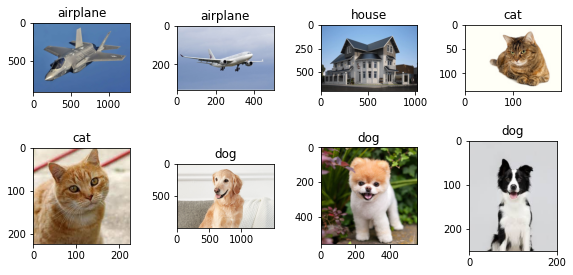

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

for idx in range(len(src_list)):
    plt.subplot(2,4,idx+1)
    tmp = cv2.cvtColor(src_list[idx], cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.title(labels[idx])
plt.tight_layout()
plt.show()

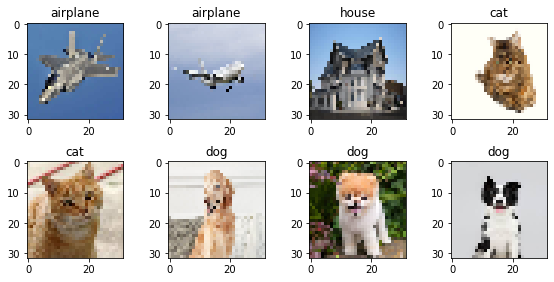

In [27]:
plt.figure(figsize=(8,4))

for idx in range(len(dst_list)):
    plt.subplot(2,4,idx+1)
    plt.imshow(dst_list[idx])
    plt.title(labels[idx])
plt.tight_layout()
plt.show()

In [28]:
import numpy as np
test_data = np.array(dst_list)
print(test_data.shape)

(8, 32, 32, 3)


In [29]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [30]:
pred = cnn.predict(test_data)
pred.shape

(8, 10)

In [31]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  airplane 0.999949
prediction =>  airplane 1.0
prediction =>  truck 0.41118652
prediction =>  cat 0.9993635
prediction =>  dog 0.9508884
prediction =>  dog 0.97040963
prediction =>  dog 0.9174404
prediction =>  dog 0.95576715


In [32]:
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[0 2 4 8 3 6 5 7 9 1]
prediction =>  airplane 0.999949
prediction =>  bird 3.0131449e-05
prediction =>  deer 2.083956e-05
[0 2 8 4 3 9 6 5 7 1]
prediction =>  airplane 1.0
prediction =>  bird 2.4126313e-08
prediction =>  ship 3.5874075e-11
[9 0 7 8 3 5 2 1 6 4]
prediction =>  truck 0.41118652
prediction =>  airplane 0.39019406
prediction =>  horse 0.12489995
[3 5 6 7 2 4 9 0 1 8]
prediction =>  cat 0.9993635
prediction =>  dog 0.00063507323
prediction =>  frog 1.0616955e-06
[5 3 6 7 4 2 8 9 1 0]
prediction =>  dog 0.9508884
prediction =>  cat 0.035632446
prediction =>  frog 0.009060885
[5 2 3 7 4 6 0 8 9 1]
prediction =>  dog 0.97040963
prediction =>  bird 0.022851173
prediction =>  cat 0.0063683665
[5 4 3 7 2 6 0 9 1 8]
prediction =>  dog 0.9174404
prediction =>  deer 0.039465584
prediction =>  cat 0.02093128
[5 2 3 7 0 4 6 8 9 1]
prediction =>  dog 0.95576715
prediction =>  bird 0.024543121
prediction =>  cat 0.016806925
